# 💻 UnpackAI DL201 Bootcamp - Week 2 - Concepts: Continuous Variables

### 📕 Learning Objectives
<hr style="border:2px solid gray"> </hr>


* Firmly grasp how continuous variables have a mathematical meaning which allows for certain algorithms to use them as input data  
* Gain an Appreciation for how **scaling** can not only decrease training time, but also increase increase the quality of the input data in both tabular and image data
* Understand the differences between standardization and normalization, and in which situations to apply them
* Build awareness of the importance of the normal distribution, and how to transform data using log and boxcox transforms
* Appreciate how these very same properties can be applied in 2 or more dimensions in image data through broadcasting methods



### 📖 Concepts map
<hr style="border:2px solid gray"> </hr>


* Quantitative vs Qualitative
* Fundamental Theorem of Calculus
* Law of Large Numbers/
* Normal Distribution
* Standard Deviation
* Skew
* Tensor Data Types
* Garbage in Garbage out
* Local vs Global Transformation


In [1]:
#Imports
!pip install openpyxl
!git clone https://github.com/unpackAI/DL201.git


# Imports 
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


# Kaggle Config
IMAGE_DIR = Path('/kaggle/working/DL201/img') #uncomment for Kaggle
DATA_DIR = Path('/kaggle/working/DL201/data')

# Local Config
#DATA_DIR = Path.home()/'Datasets/unpackAI/DL201/data' #uncomment/adjust for local machine
#IMAGE_DIR = Path.home()/'Projects/unpackAI/DL201/img'  #uncomment/change for local machine


### Functions

# Splits columns into categorical and continious variables 
def cont_cat_split(df, max_card=20, dep_var=None):
    "Helper function that returns column names of cont and cat variables from given `df`."
    cont_names, cat_names = [], []
    for label in df:
        #if label in L(dep_var): continue
        if ((pd.api.types.is_integer_dtype(df[label].dtype) and
            df[label].unique().shape[0] > max_card) or
            pd.api.types.is_float_dtype(df[label].dtype)):
            cont_names.append(label)
        else: cat_names.append(label)
    return cont_names, cat_names




## What is a Continuous Variable?
<hr style="border:2px solid gray"> </hr>


There are primarily two kinds of variables in statistics, being continuous and categorical. Continuous variables are quantifiable numbers that exist on a spectrum. An ideal continuous variable can be any number or decimal between the minimum and maximum. For example, measurements based in units such as grams, meters, and liters, temperature ect. meet this criteria. 

However, it gets a bit fuzzy when you have real world data. However, there's enough data, it's generally accepted to treat anything that can exist on an ordered spectrum, has many possible states and has mathematical meaning as a continuous variable. For example, financial data such as revenue, profits, number of items sold, or price are continuous variables.

Another question here comes down to where an image fits into this. Because there are many different possible values in a pixel, and many thousands of pixels in each image, it becomes possible to treat an image as a continuous variable. Because they have these same, base, numerical properties, it is possible to extend the same techniques done across columns in statistics and broadcast them in 2 or 3 dimensions. 

### What are some examples of continuous variables

* Weight
* Running Distance
* Revenue
* Number of Tickets Sold

* Grayscale Image
* RGB Image

In [2]:
houses_df = pd.read_csv(DATA_DIR/'house-prices'/'train.csv',index_col=0)

In [3]:
cont_vars, cat_vars = cont_cat_split(houses_df)

Here are the continuous variables in this dataset.

In [4]:
print(cont_vars)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


If you wish to swap one of the features of your dataset, you can use this function to do so.

In [5]:
def change_feature_type(swapFeature,cat_vars,cont_vars):
    cat_df = pd.DataFrame(cat_vars)
    cont_df = pd.DataFrame(cont_vars)

    cat_result = cat_df[cat_df[0]==swapFeature]
    cont_result = cont_df[cont_df[0]==swapFeature]

    if len(cat_result) > 0:
        print(f'Found: {swapFeature} in catagorical varaibles, swapping to continous variable')
        cont_vars.append(swapFeature)
        cat_vars.remove(swapFeature)

    elif len(cont_result) > 0:
        print(f'Found: {swapFeature} in continuous variables, swapping to catagorical variable')
        cat_vars.append(swapFeature)
        cont_vars.remove(swapFeature)

    else:
        print(f"Feature: {swapFeature} was not found in either list, please check spelling")  
    return (cat_vars,cont_vars)

In [6]:
#swapThisFeature = '' #'Column_Name'

#cat_vars, cont_vars = change_feature_type(swapThisFeature,cat_vars,cont_vars)


## How can Machine Learning and Deep Learning Use Them?
<hr style="border:2px solid gray"> </hr>


As a result of being numbers, they have some amazing properties that form the foundations which science, and ultimately many Machine Learning and Deep Learning models are built on. 

### Mathematical Meaning



For this, at a high level, there are two very critical properties of continous numbers that models use we are going to talk about.

* One is the the slope of a line, which comes from methods of calculus.

* The Second is distance, which comes from geometry. 

The first point about the slope of a line (or gradient 2D+) gives us the parameters in regression based models, SGD (Stochastic Grade Descent) ect.

The second property of distance we can use, allows us to create a relationship between different values using the concept of distance (Euclidean Distance).

At this point, we're note getting into how the models work, but rather going over just enough to understand the reasons why they need to be preprocessed to get the best results out of a Machine Learning or Deep Learning Model. 



## Why do We Need to Scale Continuous Variables?
<hr style="border:2px solid gray"> </hr>


### Many AI Algorithms Train Faster
<hr style="border:2px solid gray"> </hr>


Real world data can have many different forms. There could be continuous variables that have only small differences between the largest and smallest value, or there can be a range of millions. 

But, because there are numbers involved, it's not so much the actual values that are important, but the relationship between them. Scaling not only makes the models have to work less hard, but extracts the key relationships in the data which actually are important and puts them onto a level playing field.

#### Models that use Distance as a measure

Models such as K-Means or K-Nearest Neighbors use the concept of distance to extract information from the features. 

If the different features have very different ranges of values, then not only does the model have to train longer to get the relationships, but the distances are relative only to themselves rather than across the dataset. 

For example, if we had a distance of meters walked by an ant, and a distance of kilometers walked by an elephant, then the distance the elephant traveled is much greater, even if the ant traveled much further relative to it's body size. 

#### Models that calculate gradients/slopes

Other models, such as SGD (Stochastic Grade Descent) use the concept of slope to optimize the performance of the model. When the values are normalized within a same range, it trains faster than having some parameters as huge, than other parameters as very small.

### Allows model to become more complex
<hr style="border:2px solid gray"> </hr>

In Deep Learning there can be thousands upon thousands of parameters in a model. As a result, some of the parameters can become quite tiny because they all need to add up to a small value.

If some of the features are larger than others, then it drowns out the importance of smaller valued features. By having scaled values, we can increase the complexity of the model



Scaling continuous variables is critical not only to save computer resources, but also to improve the accuracy of the model. Many AutoML tools do this automatically, but it is important to understand the concepts so that they are applied appropriately.

# Section 1: Scaling Tabular Data 
<hr style="border:4px solid gray"> </hr>


In this notebook, we'll start with Tabular Data because we can treat it as 1D, then build up the knowledge base so that it can be applied to images as well.

### Normalization 
<hr style="border:2px solid gray"> </hr>


#### Min Max Scaling 

One problem that could result from having a large range of data is that the large numbers and variance can cause the model to see it as more important than variables that have a smaller variance. 

Normalization can put the values into a range that falls between zero and one

This is a way of scaling takes a value, sutracts it from the smallest value in the column, then divides it by the difference between the largest and smallest columns.

$$ \tilde{x}_i = \frac{x_i - x_{min}}{x_{max} - x_{min}}. $$

This is useful in situations which are not sensitive to outliars. Since, if there is a huge max or tiny minimum value is going to drastically affect the formula. 

A year column would benefit from this kind of transformation. Since we are in the 21st century, everything in this column is going to have a huge offset of 2000

In [7]:
houses_df['YearBuilt'].mean()

1971.267808219178

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

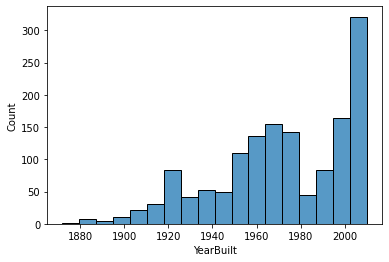

In [8]:
sns.histplot(houses_df['YearBuilt'])

In a large model, this is a problem, because it will change the parameter associated with the house prices to assume that the number will be very large relative to the other ones.  

In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

df = houses_df

column_names_to_normalize = ['YearBuilt','YearRemodAdd','GarageYrBlt']


x = df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)

df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df[column_names_to_normalize] = df_temp

houses_df = df.copy()

In [10]:
houses_df['YearBuilt'].describe()

count    1460.000000
mean        0.719332
std         0.218862
min         0.000000
25%         0.594203
50%         0.731884
75%         0.927536
max         1.000000
Name: YearBuilt, dtype: float64

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

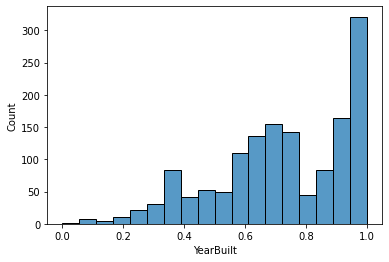

In [11]:
sns.histplot(houses_df['YearBuilt'])

Although it is no longer meaningful to a person because we've lost the dates and our associations with them, it is much more clear to a machine because all the values are between zero and one. 

This transform does not change the ratios of values to eachother. The two graphs look identical, except for now that they have different values. 

Why is the skew unaffected by this transform? What information does this transform preserve?

In [12]:
houses_df['YearBuilt'].skew()

-0.6134611724881864

Generally speaking, standardization should be used when your model has a regularization term or is otherwise sensitive to the scaling of the input features. Standardization transforms all features onto the same scaling, thereby ensuring that regularization and other scaling-sensitive operations work properly.

### Standardization 
<hr style="border:2px solid gray"> </hr>


Problems with large scales of numbers can be that it is not easy to see a pattern if there are a huge range of possible values.

This is where the normal distribution comes in. A normal distribution is an incredibly important property of large samples that allows a class of machine learning algorithms to work.

They do this because a probability value can be assigned to a sample. Based on how far it is from the mean, assumptions can be made about how likely this value is to appear.


 If they are standardized, we are no longer looking at the raw value. But instead looks at how many standard deviations it is from the mean.

 Again, it is not the individual numbers that are important, but the relationship between them which really matters. Standardization shows this to the model more clearly.

https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html

### Skewed Data

The problem is that data often comes in a skewed form. This can be corrected by various transforms. 

Although there is no consensus on the threshold of what constitutes skewed data, but for the purposes of this notebook, a skew value above 1 is considered skewed. 

Skew of Sales Price Distribution:  1.8828757597682129


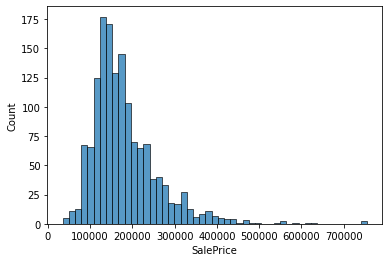

In [13]:
sns.histplot(houses_df['SalePrice'])
print('Skew of Sales Price Distribution: ', houses_df['SalePrice'].skew())

This looks like a very nice graph, but it has a real problem. There is a strong skew to the left with an appreciable tail. As you can see below, the skew value is quite large

In [14]:
skewedFeatures = houses_df[cont_vars].skew().sort_values(ascending=False)
skewedFeatures = pd.DataFrame({'Skew':skewedFeatures})
PositiveSkewedFeatures = skewedFeatures[skewedFeatures['Skew'] > 1 ]

skewedFeatures = houses_df[cont_vars].skew().sort_values(ascending=False)
skewedFeatures = pd.DataFrame({'Skew':skewedFeatures})
NegativeSkewedFeatures = skewedFeatures[skewedFeatures['Skew'] < -1 ]

normalFeatures = houses_df[cont_vars].skew().sort_values(ascending=False)
normalFeatures = pd.DataFrame({'Skew':normalFeatures})
normalFeatures = normalFeatures[normalFeatures['Skew'].abs() < 1 ]

In [15]:
print('Number of Negative Skewed Features: ',len(NegativeSkewedFeatures))
print('Number of Positive Skewed Features: ',len(PositiveSkewedFeatures))
print('Number of not Skewed Features: ',len(normalFeatures))

Number of Negative Skewed Features:  0
Number of Positive Skewed Features:  15
Number of not Skewed Features:  6


These statistics, among many others can rapidly and easily be obtained by pandas methods and a quick internet search.

In this notebook, we don't go into kurtosis for lack of time, but this is also available in the pandas library.

#### Log Transforms 

Log transforms help to normalize data significantly. This is useful in positive skew distributions

In [16]:
houses_df['SalePrice'] = np.log(houses_df['SalePrice'])


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

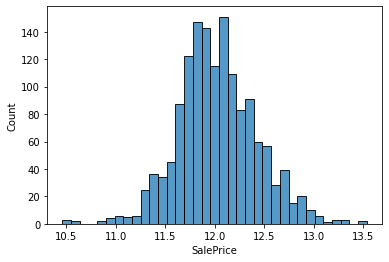

In [17]:
sns.histplot(houses_df['SalePrice'])

As you can see, this graph is now looking much more like a normal distribution. It has a skew much closer to zero, which means that we can use linear models, and the model will train faster.

In [18]:
houses_df['SalePrice'].skew()

0.12133506220520393

#### Boxcox Transform

The Boxcox Transform is another method in the scipy library that usually performs better than log transforms. It is a commonly used tool to normalize skewed data

In [19]:
skewedFeatures = houses_df[cont_vars].skew().sort_values(ascending=False)
skewedFeatures = pd.DataFrame({'Skew':skewedFeatures})
skewedFeatures = skewedFeatures[skewedFeatures['Skew'] > 1 ]

In [20]:
#stats
from scipy import stats

df = houses_df.copy()

for col in skewedFeatures.index:
    #print(col)
    original_skew = round(df[col].skew(),2)
    
    #np.clip replaces zeros with tiny numbers
    # to avoid how it's impossible to take
    # the log of zero
    
    transformed_col = stats.boxcox(np.clip(df[col],0.0001,None))[0]
    
    tsfm_skew = round(pd.Series(transformed_col).skew(),2)
    
    if abs(tsfm_skew) < abs(original_skew):
        df[col] = transformed_col
        print(f'{col} skewed decreased from {original_skew} to {tsfm_skew}')
    else:
        pass


houses_df = df

MiscVal skewed decreased from 24.48 to 5.02
LotArea skewed decreased from 12.21 to 0.03
LowQualFinSF skewed decreased from 9.01 to 7.3
BsmtFinSF2 skewed decreased from 4.26 to 2.43
ScreenPorch skewed decreased from 4.12 to 3.11
EnclosedPorch skewed decreased from 3.09 to 2.05
OpenPorchSF skewed decreased from 2.36 to -0.17
BsmtFinSF1 skewed decreased from 1.69 to -0.64
WoodDeckSF skewed decreased from 1.54 to 0.09
TotalBsmtSF skewed decreased from 1.52 to -0.43
1stFlrSF skewed decreased from 1.38 to -0.0
GrLivArea skewed decreased from 1.37 to 0.0


In [21]:
from sklearn.preprocessing import StandardScaler
standard_scalar = StandardScaler()

df = houses_df

columns_to_standardize = cont_vars

x = df[columns_to_standardize].values


x_scaled = standard_scalar.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=columns_to_standardize, index = df.index)
df[columns_to_standardize] = df_temp

houses_df = df

# Section 2: Scaling Image Data
<hr style="border:4px solid gray"> </hr>


Now that we have done through scaling 1D tabular data, it is only a matter of applying an understanding of broadcasting rules to  2D and 3D data. 


Because the normal distribution is so pervasive, it is only natural that it would appear in images as well. Images also often have a normal distribution of pixel values.


### Why do images need to be scaled?
<hr style="border:2px solid gray"> </hr>



Secondly, scaling become even more important for images going into Neural Networks. Nueral Networks can have millions of parameters, and this can also affect the magnitude of the loss functions, and activation functions. It's easier for networks to learn when the data is scaled to zero mean, or between 0-1. 

In [22]:
from PIL import Image
from matplotlib import pyplot as plt

imagePath = IMAGE_DIR/'week2'/'goldengatebridge.jpg'

image = Image.open(imagePath)

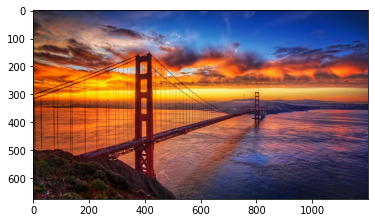

In [23]:
# It's always a good idea to check the type
type(image)
plt.imshow(image)
plt.show()

This image has many colors in it and is a good candidate to test using what we learned about tabular data and applying to higher dimensional data. Let's first represent it as a 3D array

In [24]:
rgb_array = np.asarray(image)

In [25]:
#always check the shape 
rgb_array.shape

(675, 1200, 3)

### Image Normalization
<hr style="border:2px solid gray"> </hr>


most images have pixel values between 0 and 255.

Since we are no longer using it to display it for a person to read, we should change its representation to make the mathematical meaning more clear. This not only speeds up the training process, but eliminates possible complications that become difficult to check out once the model is trained because there are so many parameters.

Scaling all values to be between between 0-1 accomplishes this. 

In [26]:
# This allows us to make decimal values
rgb_array = rgb_array.astype('float32')

In [27]:
normalized_array = rgb_array / 255.0

In [28]:
rgb_array.min()

0.0

In [29]:
rgb_array.max()

255.0

Normalization is the best way to prepare data which you are not sure how to preprocess. It preserves all the quantifiable information in the dataset, and doesn't require any statistics to do.

### Image Centering (Mean Scaling)
<hr style="border:2px solid gray"> </hr>


Before, where we are operating on a column, we were doing it with 1D data. Now we are using 3D data with three channels, but are essentially doing the same thing.

Mean Scaling is not covered in this notebook because it is similar to 

### Image Standardization
<hr style="border:2px solid gray"> </hr>


Often, the distribution of pixels in an image will follow a normal distribution (bell curve).

This may be present across the entire dataset, or in batches of images, which allows for the transformation to be done in batches on a GPU very quickly.

However, in this example, we will just standardize one image so that we can form a base of understanding.

In [30]:

# calculate global mean and standard deviation
global_pixel_mean = rgb_array.mean()
print('Mean of all Pixels: ', global_pixel_mean)

global_pixel_std = rgb_array.std()
print('standard deviation of all pixels: ',global_pixel_std)
# global standardization of pixels
standardized_array = (rgb_array - global_pixel_mean) / global_pixel_std

# 
standardized_array = np.clip(standardized_array, -1.0, 1.0)





Mean of all Pixels:  94.40775
standard deviation of all pixels:  63.49829


In [31]:
# confirming the changes
standardized_pixel_mean = standardized_array.mean()
print('Mean of all Pixels: ', standardized_pixel_mean)

standardized_pixel_std = standardized_array.std()
print('standard deviation of all pixels: ',standardized_pixel_std)

Mean of all Pixels:  -0.09064032
standard deviation of all pixels:  0.729131


### Local Standardization
<hr style="border:1px solid gray"> </hr>

It is also possible to standardize each channel invididually rather than across the whole image

In [32]:
rgb_means = rgb_array.mean(axis=(0,1), dtype='float64')
rgb_stds = rgb_array.std(axis=(0,1), dtype='float64')

print('Means: %s, Stds: %s' % (rgb_means, rgb_stds))
# per-channel standardization of pixels


standardized_array_3_channel = (rgb_array - rgb_means) / rgb_stds


Means: [120.02629259  82.21949506  80.97756173], Stds: [76.63424927 47.26471718 54.80974237]


In [33]:
# confirming that it worked
rgb_means_after = standardized_array_3_channel.mean(axis=(0,1), dtype='float64')
rgb_stds_after = standardized_array_3_channel.std(axis=(0,1), dtype='float64')


print('Means: %s, Stds: %s' % (rgb_means_after, rgb_stds_after))

Means: [-3.51901518e-14  9.44147770e-14  1.27095709e-13], Stds: [1. 1. 1.]


Now, the values are much more tightly packed than before, which allows for the model to see patterns more easily because the values are within well defined ranges.

# Wrap up: Discussion
<hr style="border:4px solid gray"> </hr>


### Extension Questions 

* What is a continuous variable? Why are they special?

* What is a normal distribution? What is skew?

* What is min-max scaling? Why is it used with tensors?

* What is standardization? What does it do to data?

* When should one use standardization and when should one use normalization?